In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# MNIST 데이터 셋을 불러옵니다
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

# 생성자 모델을 만듭니다
autoencoder = Sequential()

# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28, 28, 1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인
autoencoder.summary()

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                         

Epoch 1/50
469/469 [==============================] - 19s 10ms/step - loss: 0.2180 - val_loss: 0.1463
Epoch 2/50
469/469 [==============================] - 4s 8ms/step - loss: 0.1335 - val_loss: 0.1231
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1184 - val_loss: 0.1126
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1107 - val_loss: 0.1068
Epoch 5/50
469/469 [==============================] - 4s 9ms/step - loss: 0.1058 - val_loss: 0.1027
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1025 - val_loss: 0.0999
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1000 - val_loss: 0.0979
Epoch 8/50
469/469 [==============================] - 5s 10ms/step - loss: 0.0981 - val_loss: 0.0963
Epoch 9/50
469/469 [==============================] - 4s 9ms/step - loss: 0.0966 - val_loss: 0.0948
Epoch 10/50
469/469 [==============================] - 4s 8ms/step - loss: 0.0953 - val_loss: 0.0

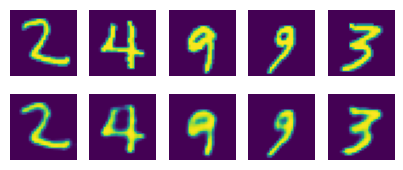

In [3]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)

# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test)   # 앞서 만든 오토인코더 모델에 넣기


plt.figure(figsize=(7, 2))         # 출력할 이미지 크기 정하기


for i, image_idx in enumerate(random_test):

    # 랜덤으로 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2, 7, i+1)

    # 테스트할 이미지를 먼저 그대로 보여줌
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7+i+1)

    #오토인코딩 결과를 다음열에 출력합니다.
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')